In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [145]:
data_path = '../SIGA/'
camp_folder = data_path + 'campamento/'
sierra_folder = data_path + 'sierraGorda/'

In [146]:
# cargar datos metereologicos de campamento (spence)
# cargar datos metereologicos de sierraGorda (poblado)
name_cols_sg = ['Fecha_sg', 'hora_sg', 'DIR_sg', 'VEL_sg', 'TEMP_sg', 'HR_sg', 'PLUV_sg', 'RAD_SOLAR_sg']
name_cols_camp = ['Fecha_camp', 'hora_camp', 'DIR_camp', 'VEL_camp', 'TEMP_camp', 'HR_camp', 'PLUV_camp', 'RAD_SOLAR_camp']
camp_cols_dtypes = {'Fecha_camp':str, 'hora_camp':str, 'DIR_camp':float, 'VEL_camp':np.float64, 
               'TEMP_camp':np.float64, 'HR_camp':np.float64,'PLUV_camp':np.float64, 
               'RAD_SOLAR_camp':np.float64}
sg_cols_dtypes = {'Fecha_sg':str, 'hora_sg':str, 'DIR_sg':float, 'VEL_sg':np.float64, 
               'TEMP_sg':np.float64, 'HR_sg':np.float64,'PLUV_sg':np.float64, 
               'RAD_SOLAR_sg':np.float64}
met_sg_2017 = pd.read_excel(sierra_folder + 'met_2017_hora.xlsx',usecols=list(range(1,9)),
                            names=name_cols_sg, converters = sg_cols_dtypes)
met_camp_2017 = pd.read_excel(camp_folder + 'met_2017_hora.xlsx', usecols=list(range(1,9)), 
                              names=name_cols_camp, converters = camp_cols_dtypes)


In [77]:
# merge para ver bººbque dias coinciden sg y camp en 2017
met_camp_2017['Fecha_camp'] = pd.to_datetime(met_camp_2017['Fecha_camp'])
met_sg_2017['Fecha_sg'] = pd.to_datetime(met_sg_2017['Fecha_sg'])
met_2017 = pd.concat([met_sg_2017, met_camp_2017], join='inner', axis=1)
met_2017["DIR_camp"] = pd.to_numeric(met_2017["DIR_camp"],errors='corce')
met_2017["DIR_sg"] = pd.to_numeric(met_2017["DIR_sg"],errors='corce')
met_2017["VEL_camp"] = pd.to_numeric(met_2017["VEL_camp"], errors='corce')
met_2017["VEL_sg"] = pd.to_numeric(met_2017["VEL_sg"], errors='corce')
met_2017.dropna()

,Fecha_sg,hora_sg,DIR_sg,VEL_sg,TEMP_sg,HR_sg,PLUV_sg,RAD_SOLAR_sg,Fecha_camp,hora_camp,DIR_camp,VEL_camp,TEMP_camp,HR_camp,PLUV_camp,RAD_SOLAR_camp
0,2017-01-01,00:00:00,122.1,0.46,14.45,35.157,0.00,0.00,2017-01-01,00:00:00,195.4,0.66,15.81,35.602,0.00,0.00
1,2017-01-01,01:00:00,25.5,0.74,13.35,35.447,0.00,0.00,2017-01-01,01:00:00,350.7,0.85,14.81,37.575,0.00,0.00
2,2017-01-01,02:00:00,162.4,0.68,12.71,35.285,0.00,0.01,2017-01-01,02:00:00,355.6,0.65,14.09,37.355,0.00,0.00
3,2017-01-01,03:00:00,58.0,0.70,12.2,35.333,0.00,0.00,2017-01-01,03:00:00,334.6,0.94,12.89,36.383,0.00,0.00
4,2017-01-01,04:00:00,39.0,1.30,11.46,36.367,0.00,0.00,2017-01-01,04:00:00,335.8,0.84,12.55,36.307,0.00,0.00
5,2017-01-01,05:00:00,57.7,2.65,10.75,38.96,0.00,1.55,2017-01-01,05:00:00,343.6,2.23,12.95,40.043,0.00,1.31
6,2017-01-01,06:00:00,51.0,3.22,12.22,41.435,0.00,99.52,2017-01-01,06:00:00,340.1,2.03,13.5,43.975,0.00,97.84
7,2017-01-01,07:00:00,32.5,3.43,15.88,38.58,0.00,312.34,2017-01-01,07:00:00,342.4,1.32,15.86,39.295,0.00,297.16
8,2017-01-01,08:00:00,15.5,2.70,20.24,28.9,0.00,549.83,2017-01-01,08:00:00,296.1,0.86,19.7,30.912,0.00,528.41
9,2017-01-01,09:00:00,216.8,1.33,25.11,19.273,0.00,768.78,2017-01-01,09:00:00,323.6,2.48,21.73,26.37,0.00,731.88


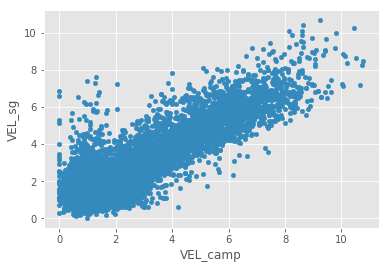

In [90]:
met_2017.plot.scatter(x='VEL_camp', y='VEL_sg')

In [79]:
# cargar datos metereologicos de campamento (spence)
# cargar datos metereologicos de sierraGorda (poblado)
name_cols_sg = ['Fecha_sg', 'hora_sg', 'DIR_sg', 'VEL_sg', 'TEMP_sg', 'HR_sg', 'PLUV_sg', 'RAD_SOLAR_sg']
name_cols_camp = ['Fecha_camp', 'hora_camp', 'DIR_camp', 'VEL_camp', 'TEMP_camp', 'HR_camp', 'PLUV_camp', 'RAD_SOLAR_camp']
camp_cols_dtypes = {'Fecha_camp':str, 'hora_camp':str, 'DIR_camp':float, 'VEL_camp':np.float64, 
               'TEMP_camp':np.float64, 'HR_camp':np.float64,'PLUV_camp':np.float64, 
               'RAD_SOLAR_camp':np.float64}
sg_cols_dtypes = {'Fecha_sg':str, 'hora_sg':str, 'DIR_sg':float, 'VEL_sg':np.float64, 
               'TEMP_sg':np.float64, 'HR_sg':np.float64,'PLUV_sg':np.float64, 
               'RAD_SOLAR_sg':np.float64}
met_sg_2018 = pd.read_excel(sierra_folder + 'met_2018_hora.xlsx',usecols=list(range(1,9)),
                            names=name_cols_sg, converters = sg_cols_dtypes)
met_camp_2018 = pd.read_excel(camp_folder + 'met_2018_hora.xlsx', usecols=list(range(1,9)), 
                              names=name_cols_camp, converters = camp_cols_dtypes)


In [80]:
# merge para ver bººbque dias coinciden sg y camp en 2017
met_camp_2018['Fecha_camp'] = pd.to_datetime(met_camp_2018['Fecha_camp'])
met_sg_2018['Fecha_sg'] = pd.to_datetime(met_sg_2018['Fecha_sg'])
met_2018 = pd.concat([met_sg_2018, met_camp_2018], join='inner', axis=1)
met_2018["DIR_camp"] = pd.to_numeric(met_2018["DIR_camp"],errors='corce')
met_2018["DIR_sg"] = pd.to_numeric(met_2018["DIR_sg"],errors='corce')
met_2018["VEL_camp"] = pd.to_numeric(met_2018["VEL_camp"], errors='corce')
met_2018["VEL_sg"] = pd.to_numeric(met_2018["VEL_sg"], errors='corce')
met_2018.dropna()

,Fecha_sg,hora_sg,DIR_sg,VEL_sg,TEMP_sg,HR_sg,PLUV_sg,RAD_SOLAR_sg,Fecha_camp,hora_camp,DIR_camp,VEL_camp,TEMP_camp,HR_camp,PLUV_camp,RAD_SOLAR_camp
0,2018-01-01,00:00:00,42.7,3.20,14.03,40.47,0.00,0.00,2018-01-01,00:00:00,338.8,1.47,15.34,33.313,0.00,0.00
1,2018-01-01,01:00:00,43.7,2.39,13.15,43.663,0.00,0.00,2018-01-01,01:00:00,335.8,2.54,14.11,43.69,0.00,0.00
2,2018-01-01,02:00:00,27.2,4.61,13.23,54.62,0.00,0.01,2018-01-01,02:00:00,10.4,2.34,12.96,50.785,0.00,0.00
3,2018-01-01,03:00:00,45.9,3.55,12.29,51.682,0.00,0.00,2018-01-01,03:00:00,342.7,2.02,12.96,49.377,0.00,0.00
4,2018-01-01,04:00:00,78.0,2.47,11.33,53.955,0.00,0.00,2018-01-01,04:00:00,138.9,1.24,12.83,45.84,0.00,0.00
5,2018-01-01,05:00:00,39.9,0.41,10.35,50.03,0.00,0.76,2018-01-01,05:00:00,186.8,1.19,12.22,43.57,0.00,0.69
6,2018-01-01,06:00:00,60.8,0.82,11.14,46.765,0.00,79.61,2018-01-01,06:00:00,42.9,0.89,12.67,43.995,0.00,75.44
7,2018-01-01,07:00:00,66.1,1.36,16.37,35.165,0.00,303.95,2018-01-01,07:00:00,305.1,1.05,16.87,33.675,0.00,299.24
8,2018-01-01,08:00:00,14.7,4.25,18.07,43.682,0.00,549.46,2018-01-01,08:00:00,336.0,2.43,18.04,37.127,0.00,535.78
9,2018-01-01,09:00:00,5.5,4.41,19.87,43.243,0.00,764.64,2018-01-01,09:00:00,325.4,3.70,19.52,42.95,0.00,737.55


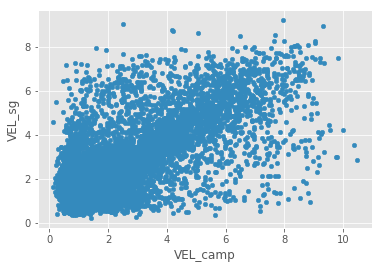

In [91]:
met_2018.plot.scatter(x='VEL_camp', y='VEL_sg')

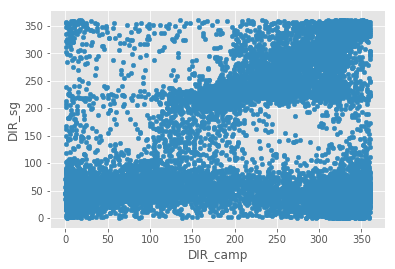

In [101]:
result = pd.concat([met_2017,met_2018])
result.dropna()
result.plot.scatter(x='DIR_camp', y='DIR_sg')

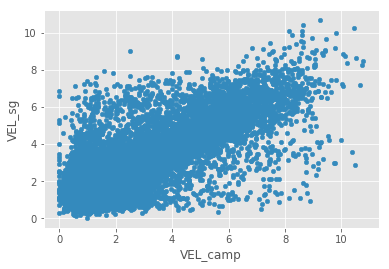

In [98]:
result.plot.scatter(x='VEL_camp',y='VEL_sg')

In [124]:
def r2(x,y):
    y_mean = np.mean(y)
    SStot = sum(np.power((y-y_mean),2))
    SSres = sum(np.power((x-y),2))
    return 1-SSres/SStot

In [141]:
result.dropna()
vel_camp = result[['VEL_camp']].values
vel_sg = result[['VEL_sg']].values


In [143]:
result

,Fecha_sg,hora_sg,DIR_sg,VEL_sg,TEMP_sg,HR_sg,PLUV_sg,RAD_SOLAR_sg,Fecha_camp,hora_camp,DIR_camp,VEL_camp,TEMP_camp,HR_camp,PLUV_camp,RAD_SOLAR_camp
0,2017-01-01,00:00:00,122.1,0.46,14.45,35.157,0.00,0.00,2017-01-01,00:00:00,195.4,0.66,15.81,35.602,0.00,0.00
1,2017-01-01,01:00:00,25.5,0.74,13.35,35.447,0.00,0.00,2017-01-01,01:00:00,350.7,0.85,14.81,37.575,0.00,0.00
2,2017-01-01,02:00:00,162.4,0.68,12.71,35.285,0.00,0.01,2017-01-01,02:00:00,355.6,0.65,14.09,37.355,0.00,0.00
3,2017-01-01,03:00:00,58.0,0.70,12.2,35.333,0.00,0.00,2017-01-01,03:00:00,334.6,0.94,12.89,36.383,0.00,0.00
4,2017-01-01,04:00:00,39.0,1.30,11.46,36.367,0.00,0.00,2017-01-01,04:00:00,335.8,0.84,12.55,36.307,0.00,0.00
5,2017-01-01,05:00:00,57.7,2.65,10.75,38.96,0.00,1.55,2017-01-01,05:00:00,343.6,2.23,12.95,40.043,0.00,1.31
6,2017-01-01,06:00:00,51.0,3.22,12.22,41.435,0.00,99.52,2017-01-01,06:00:00,340.1,2.03,13.5,43.975,0.00,97.84
7,2017-01-01,07:00:00,32.5,3.43,15.88,38.58,0.00,312.34,2017-01-01,07:00:00,342.4,1.32,15.86,39.295,0.00,297.16
8,2017-01-01,08:00:00,15.5,2.70,20.24,28.9,0.00,549.83,2017-01-01,08:00:00,296.1,0.86,19.7,30.912,0.00,528.41
9,2017-01-01,09:00:00,216.8,1.33,25.11,19.273,0.00,768.78,2017-01-01,09:00:00,323.6,2.48,21.73,26.37,0.00,731.88
